
    Actual     Predicted
0    51191  51939.042887
1       68  -1265.109772
2      275   -419.301701
3    87435  83742.272078
4     9466  16877.211976
5       19  -1451.409556
6        0  -1474.785128
7    21028  27848.460329
8       26  -1432.615127
9    55979  56886.265384
10   54406  55514.624409
11   58373  58334.141264
12       0  -1476.488373
13   41919  44608.804165
14   80681  78067.822616
15     117  -1129.672412
16   68832  68234.283320
17   64859  63683.329627
18    2287   5790.025485
19     574   1078.320685
20   16673  23847.126240
21       0  -1475.842315
22   24785  31305.049618
23   82336  79377.030844

R2 Score: 0.9887949717662918


For every one unit of change in Cases, the change in Deaths is: [[5.87325929]] percent


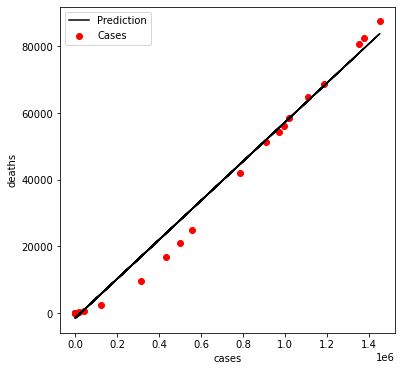

-Algorithm Performance Evaluation-
Mean Absolute Error: 2462.261492186952
Mean Squared Error: 10974742.379356159
Root Mean Squared Error: 3312.8148724847515


In [44]:
# make predictions

import numpy as np
import pandas as pd

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

#display linear regression data visualization
import matplotlib.pyplot as plt 

# Load dataset
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
# names = ['date', 'cases', 'deaths']

# read in data f
dataset = read_csv(url)

#set up data, x = features, y = target variables
#reshape x and y
x = dataset['cases'].values.reshape(-1,1)
y = dataset['deaths'].values.reshape(-1,1)

# Convert date to numerical value for use in Regression
#import datetime as dt
#x['Date'] = pd.to_datetime(x['Date'])
#x['Date'] = x['Date'].map(dt.datetime.toordinal)

# Split up data into train and validation/test
# First 80% of data assigned to training, 20% for testing, adjust with test_size
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1)

# Training the Model
x_train = np.array(x_train)
y_train = np.array(y_train)
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

# Make predictions on validation dataset
#model = SVC(gamma='auto')
#model.fit(x_train, y_train)
#predictions = model.predict(x_validation)

# Evaluate predictions
#print(accuracy_score(y_validation, predictions))
#print(confusion_matrix(y_validation, predictions))
#print(classification_report(y_validation, predictions))

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)

# make predictions on the test data
y_pred = clf.predict(x_validation)

#Comparing actual output values for x_test with predicted values (compring y_test to y_pred)
df = pd.DataFrame({'Actual': y_validation.flatten(), 'Predicted': y_pred.flatten()})
print("")
print(df)

# Assess how good model is by comparing Predictions (y_pred) to real target values for test set (y_validation)
# calculate and display r2 score for model accuracy
print("")
print('R2 Score:',r2_score(y_validation,y_pred))
print("")

print("")
print("For every one unit of change in Cases, the change in Deaths is: %s percent" %(clf.coef_ * 100))

y_plot = []
#for i in range(10):
#   y_plot.append(y_pred)
plt.figure(figsize=(6,6))
plt.scatter(x_validation,y_validation,color='red',label='Cases')
plt.plot(x_validation, y_pred, color='black', label='Prediction')
plt.xlabel('cases')
plt.ylabel('deaths')

plt.legend()
plt.show()

print("-Algorithm Performance Evaluation-")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_pred)))
